# MUSA 650 Homework 1: Basics of Machine Learning
In this assignment, you’ll explore fundamental machine learning concepts and techniques, with a focus on data preprocessing, image manipulation, and model evaluation. You are responsible for figuring out the code independently and may refer to tutorials, code examples, or use AI support, but please cite all sources.

Submit a single Jupyter Notebook containing code, narrative text, visualizations, and answers to each question. Open a pull request from your fork of this repository to the main repository for submission.

## Important Notes

- **Sample Size Considerations:** If experiments take too long with the complete dataset, start with a smaller sample for timely execution. For your final submission, use the full dataset if feasible, but if processing is still too intensive, note your sample sizes clearly. Sample size variations will not affect grading if documented appropriately.
- **Data Reshaping:** To switch between 2D and 1D representations, use functions like `numpy.flatten()` or `numpy.resize()` as needed.

# 1. Data Exploration
Load the mnist dataset using the following code, which contains all of the module imports needed for this assignment:

```
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

In [74]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.1 Dimensionality
What is the type of the training and testing datasets?

How many features are in the training dataset? The testing dataset? How many samples are in each dataset?

If an array has a shape of `(100, 28, 28)`, what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?

How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how `flatten()` and `reshape()` can be used for this purpose.

Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)

In [76]:
# The type of the training and testing datasets.
print(type(x_train))
print(type(x_test))

# The number of features and samples in each dataset.
print(x_train.shape)
print(x_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <li> Both the training and testing datasets are Numpy arrays.</li>
    <li> There are $28 \times 28 = 784$ features in both the training and testing datasets.
        There are 60,000 samples in the training dataset and 10,000 samples in the testing dataset.</li> 
    <li> For an array of a shape <code>(100, 28, 28)</code>: 
        <ul>
            <li> "100" stands for the number of images.</li>
            <li> The first "28" stands for the height of each image.</li>
            <li> The second "28" stands for the width of each image.</li>
            <li> After flattening it into a 2D array, there will still be 100 images, but each image will now be represented by a 1D array of length $28 \times 28 = 784$ instead of a $28 \times 28$ 2D array.</li>
        </ul>
    </li>
    <li> To convert a 3D array into a 2D array without changing the total number of elements: </li>
    <ul>
        <li> <code>flatten()</code> will convert a 3D array into a 1D array of length $100 \times 28 \times 28 = 78,400$.
            After flattening into a 1D array, we can use <code>reshape()</code> to properly reshape it back into a 2D array of size <code>(100, 784)</code>.
            Suppose <code>X</code> is our 3D array.
            This can be done by <code>X.flatten().reshape(100, 28*28)</code>.</li>
        <li> Alternatively, we can directly use <code>reshape()</code> to achieve the same goal by <code>X.reshape(100, 28*28)</code>.</li>
    </ul>
    <li> Reshaping data when transitioning from raw images to model input is necessary because different models may have different architectures, which in turn may expect different inputs of particular shapes. So, we reshape our data to ensure compatibility of data input to the model.<br>
        (<a href = "https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e" target = "_blank">Reference 1</a>; <a href =https://medium.com/pythons-gurus/what-is-the-actual-meaning-of-flattening-a-tensor-b26a0419713c target = "_blank">Reference 2</a>)<br>
    However, reshaping an image array into a vector (1D array) bears important implication.
    Flattening an image into a 1D array results in the lose of spatial structure.
    For instance, pixels that are near to each other in the original image may no longer be near each other in the flattened array.
    The performances of machine learning tasks where spatial relationships are crucial may be affected due to the loss of this information.</li>
</ul>
</div>

### 1.2 Visualization
Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.

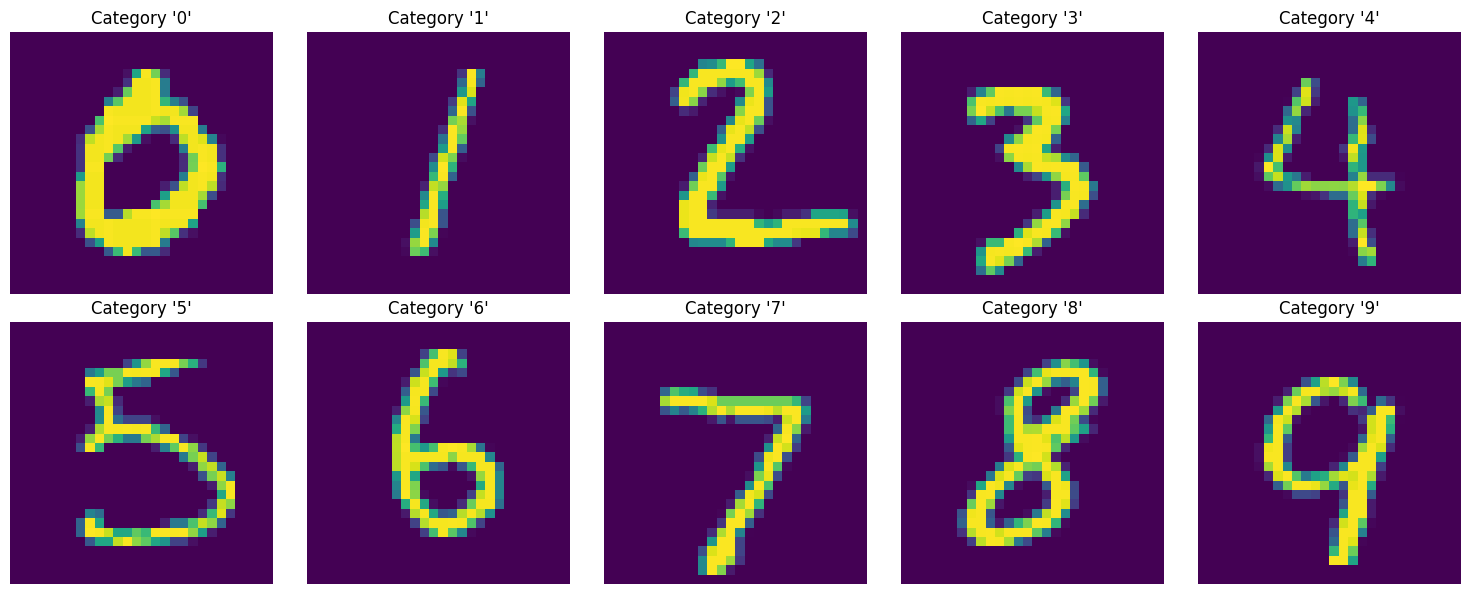

In [78]:
fig, axes = plt.subplots(2, 5, figsize = (15, 6))
selected = [3, 2, 1, 30, 24, 15, 21, 0, 110, 16]
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[selected[i]])
    ax.axis("off")
    ax.set_title(f"Category '{i}'")
plt.tight_layout()
plt.show()

## 2. Data Processing

### 2.1 Subsetting
Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

Now subset the first 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?

When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?

Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.

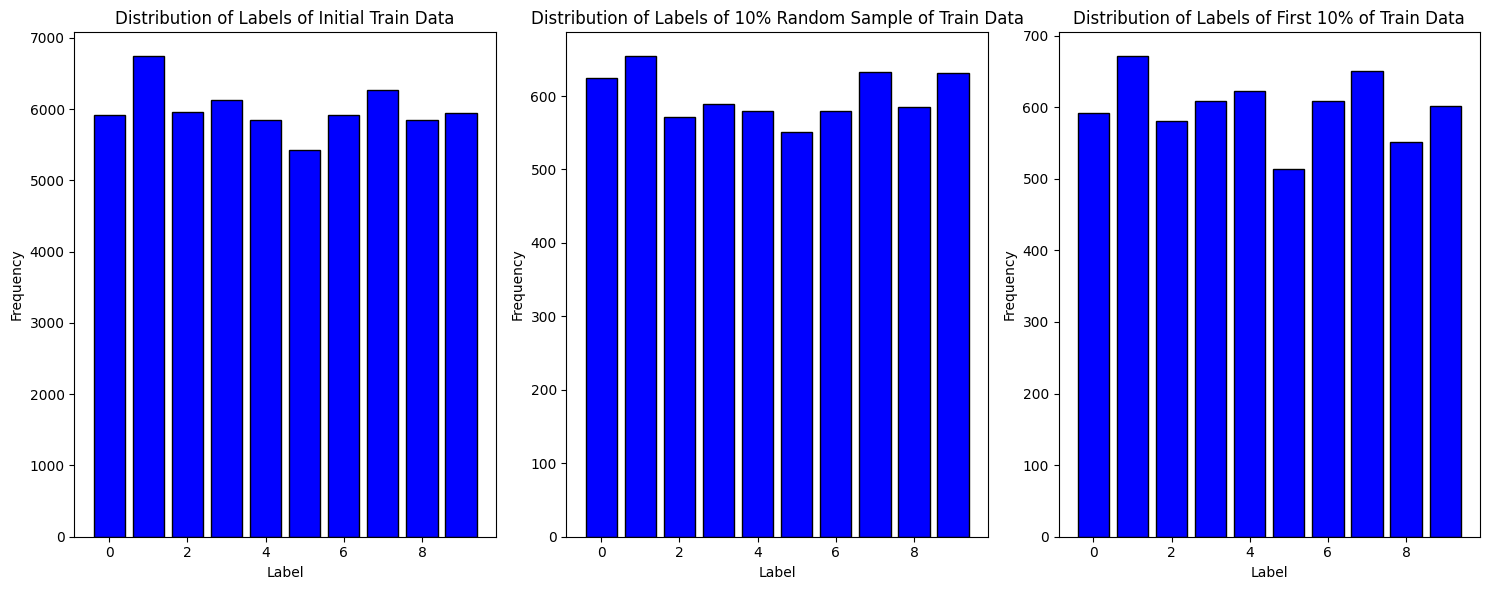

In [80]:
# Set seed for reproducibility
np.random.seed(42)

y_train_random_10pct = y_train[np.random.choice(len(y_train), size = int(0.1*len(y_train)), replace = False)]
y_test_random_10pct = y_test[np.random.choice(len(y_test), size = int(0.1*len(y_test)), replace = False)]

y_train_first_10pct = y_train[0:int(0.1*len(y_train))]
y_test_first_10pct = y_test[0:int(0.1*len(y_test))]

# The distributions of each label in the initial train data, the randomly sampled reduced train data, and the first 10% of the train data
# Step 1: Labels and frequencies
categories_full, counts_full = np.unique(y_train, return_counts=True)
categories_random, counts_random = np.unique(y_train_random_10pct, return_counts=True)
categories_first, counts_first = np.unique(y_train_first_10pct, return_counts=True)

fig, axes = plt.subplots(1, 3, figsize = (15, 6))
axes[0].bar(categories_full, counts_full, color = "blue", edgecolor = "black")
axes[0].set_title("Distribution of Labels of Initial Train Data")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Frequency")

axes[1].bar(categories_random, counts_random, color = "blue", edgecolor = "black")
axes[1].set_title("Distribution of Labels of 10% Random Sample of Train Data")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Frequency")

axes[2].bar(categories_first, counts_first, color = "blue", edgecolor = "black")
axes[2].set_title("Distribution of Labels of First 10% of Train Data")
axes[2].set_xlabel("Label")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <li> As the dataset size decreases, the distributions between the labels of the random sample and the first portion of the data may differ significantly.
    This is because a random sample could have a better chance of generating a representative subsample of the training data, while if the labels are not randomly ordered in the original training data, the first portion may return biased representation of the original training data.
    Hence, I expect to see differences in the distributions of the labels under the two different sampling schemes, if the labels are not randomly ordered in the original training dataset.</li>
    <li> The shapes of both the distribution of the 10% random sample and the first 10% of the train data look generally similar to that of the full train data.</li>
    <li> Comparison of distributions of labels between the initial train data and random sample:</li>
    <ul>
        <li> Their distributions closely resemble each other. </li>
        <li> The most prominent differences are observed for categories "7" and "9".
        The random sample contains relatively more "7"s and "9"s.</li>
    </ul>
    <li> Comparison of distributions of labels between the initial train data and first 10%:</li>
    <ul>
        <li> Their distributions differ more. </li>
        <li> Differences in distributions can be observed generally for categories "4" and above.
        The first 10% contains relatively more "4"s, "6"s, "7"s, and "9"s, but relatively less "5"s and "8"s.</li>
    </ul>
    <li> Discussions on subsampling datasets when developing machine learning models:</li>
    <ul>
        <li> <u>Pros:</u></li> 
        <ol> 
            <li> By withholding a portion of full dataset, we set aside a small portion of the dataset, so that after we train a model using the subsampled training dataset, we can evaluate our model's performance.
            Techniques such as cross-validation can be employed to improve robustness.</li>
            <li> Following the above point, we can fine-tune the hyperparameters in our models via, for instance, grid search.</li>
            <li> We could lower the risk of overfitting since we learn less about the data, which could potentially translate into greater generalizability.</li>
            <li> With a smaller sample size, the models can be trained more efficiently, both in terms of space and time.</li>
        </ol>
        <li> <u>Cons:</u></li> 
        <ol> 
            <li> We are using less data to train our model.
            While using less data could help reduce variance, it may in turn introduce larger bias.
            In other words, there is a bias-variance trade-off issue.</li>
            <li> Inadequate subsamples may fail to capture complex patterns or relationships.</li>
        </ol>
        <li> To sum up, subsampling is in general beneficial since it enables hyperparameter tunings, as well as model assessments and selection.
        However, we also need to be aware of potential trade-offs arising from inadequate or unrepresentative subsamples.</li>
    </ul>
</ul>
</div>

### 2.2 Feature Engineering
What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?

Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.

Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.

Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.

In plain English, what are we actually **doing** when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?

What is the index of the most dissimilar image in category "3" in the training set for the regular images? What about the most similar image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.

What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?

How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?

Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?

<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <li> The features are the <b>images</b> of the digits "0" - "9", and the outputs are the <b>labels</b> ("0" - "9") associated with each image.</li>
    <li> The importance of distinguishing between features (inputs) and outputs (labels) in a machine learning model is multifold.
        <ol>
            <li> 
                <b><u>Model Setup:</u></b> <i>Features (inputs)</i> are the independent variables that represent the data the model will use to make predictions, while <i>outputs (labels)</i> are the dependent variables that represent the target or outcome we want to predict.
            We have to distinguish features from outputs in order to sett up our machine learning model correctly.
            </li>
            <li>
                <b><u>Features Engineering:</u></b> Features often require preprocessing, such as scaling or encoding, but labels may require different treatment.
                Confusing features with labels would lead to issues in feature engineering.
            </li>
            <li> 
                <b><u>Prediction and Evaluation:</u></b> A machine learning model predicts outputs based on the input features, learning the mapping between them during training.
                We train a machine learning model using input features and corresponding output labels from a training set, and then predict outputs and evaluate its performance on a testing set.
                The crucial step in evaluation involves comparing the predicted outputs from our trained model with the actual outputs.
                If we do not distinguish features and labels correctly, the model would not be trained correctly, since it would not learn useful patterns.
                Evaluation on a wrongly-trained model does not make sense, and a wrongly-trained model would not help predict our true targets.
            </li>
            <li>
                <b><u>Interpretability:</u></b> Proper distinction helps in interpreting machine learning models.
                We can comprehend how different features influence predictions, which is vital for interpreting model behavior and ensuring its validity in real-world applications.
            </li>
        </ol>
    </li>
</ul>
</div>

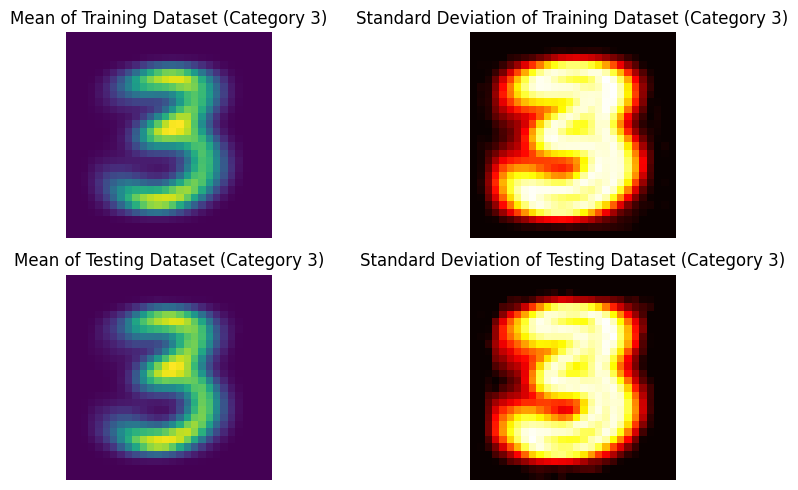

In [82]:
# Unbinarized Label "3".
x_train_three = x_train[np.where(y_train == 3)]
x_test_three = x_test[np.where(y_test == 3)]

im_train_avg_three = np.mean(x_train_three, axis = 0)
im_train_sd_three = np.std(x_train_three, axis = 0)

im_test_avg_three = np.mean(x_test_three, axis = 0)
im_test_sd_three = np.std(x_test_three, axis = 0)

fig, axes = plt.subplots(2, 2, figsize = (10, 5))

# Training dataset
axes[0, 0].imshow(im_train_avg_three)
axes[0, 0].set_title("Mean of Training Dataset (Category 3)")
axes[0, 0].axis("off")

axes[0, 1].imshow(im_train_sd_three, cmap = "hot")
axes[0, 1].set_title("Standard Deviation of Training Dataset (Category 3)")
axes[0, 1].axis("off")

# Testing dataset
axes[1, 0].imshow(im_test_avg_three)
axes[1, 0].set_title("Mean of Testing Dataset (Category 3)")
axes[1, 0].axis("off")

axes[1, 1].imshow(im_test_sd_three, cmap = "hot")
axes[1, 1].set_title("Standard Deviation of Testing Dataset (Category 3)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <li> Both the mean images for the training and testing datasets reveal a clear representation of the digit "3" and its background.
        The digit "3" appears as a thin structure, indicating that the images might resemble handwriting or a stylized representation of the number, which aligns with how numbers are typically written or drawn.
        The mean image of the training dataset looks slightly more blurry compared to that of the testing dataset, suggesting a higher degree of variability or noise in the training data; given that there are much more training images (6,131) compared to testing images (1,010), it is a plausible explanation.
        This blur could also indicate that the training dataset includes more diverse variations of the digit "3", for instance, distortions, rotations, or noise.
        Despite this, both mean images are remarkably similar in terms of their spatial distribution of the digit and the background, reinforcing the idea that both datasets contain fairly consistent representations of the digit "3" even if there are some slight differences between them.</li>
    <li> In contrast to the mean images, the standard deviation images show much wider and more spread-out features.
        This indicates the presence of greater variability in pixel values across the images.
        The training and testing dataset standard deviation images exhibit substantial variation, but overall, they look quite similar.
        This suggests that, while both datasets contain considerable intra-class variation, the overall structure of the digit "3" remains consistent.
        The larger variation in the standard deviation images also suggests the handwriting or representations of the digit "3" are not perfectly uniform; they vary in various handwriting characteristics, including but not limited to, stroke thickness and angle.</li>
    <li> Interestingly, both the mean and standard deviation images show that the digit "3" occupies largely the same space in both datasets, with very little overlap with the background.
        This suggests that both datasets may be produced or preprocessed in a similar way, such as centering or normalization of the images.
        The consistency in space usage between the training and testing datasets may also suggest that the extraction and formatting process is relatively standardized.</li>
</ul>
</div>

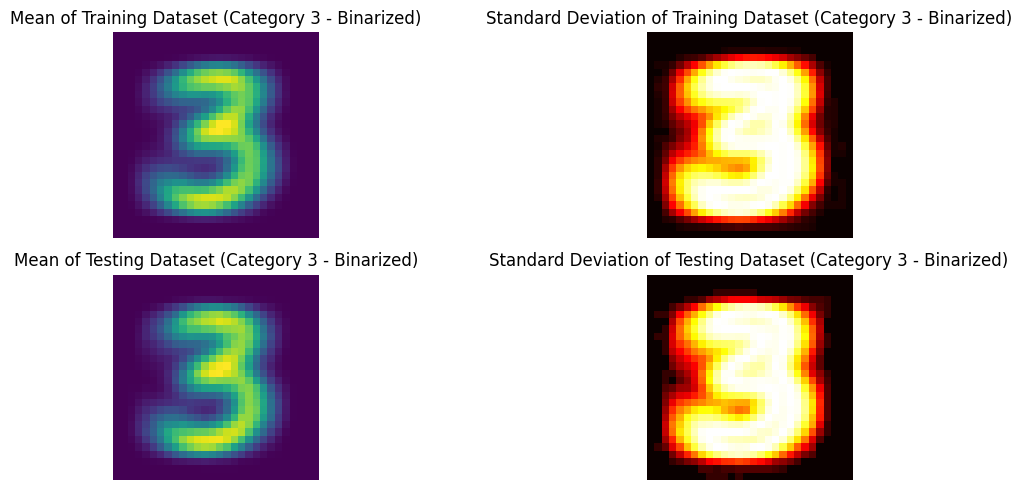

In [84]:
# Binarized Label "3".
x_train_three_bin = (x_train_three > im_train_avg_three).astype(np.int64)
x_test_three_bin = (x_test_three > im_test_avg_three).astype(np.int64)

im_train_avg_three_bin = np.mean(x_train_three_bin, axis = 0)
im_train_sd_three_bin = np.std(x_train_three_bin, axis = 0)

im_test_avg_three_bin = np.mean(x_test_three_bin, axis = 0)
im_test_sd_three_bin = np.std(x_test_three_bin, axis = 0)

fig, axes = plt.subplots(2, 2, figsize = (14, 5))

# Training dataset
axes[0, 0].imshow(im_train_avg_three_bin)
axes[0, 0].set_title("Mean of Training Dataset (Category 3 - Binarized)")
axes[0, 0].axis("off")

axes[0, 1].imshow(im_train_sd_three_bin, cmap = "hot")
axes[0, 1].set_title("Standard Deviation of Training Dataset (Category 3 - Binarized)")
axes[0, 1].axis("off")

# Testing dataset
axes[1, 0].imshow(im_test_avg_three_bin)
axes[1, 0].set_title("Mean of Testing Dataset (Category 3 - Binarized)")
axes[1, 0].axis("off")

axes[1, 1].imshow(im_test_sd_three_bin, cmap = "hot")
axes[1, 1].set_title("Standard Deviation of Testing Dataset (Category 3 - Binarized)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

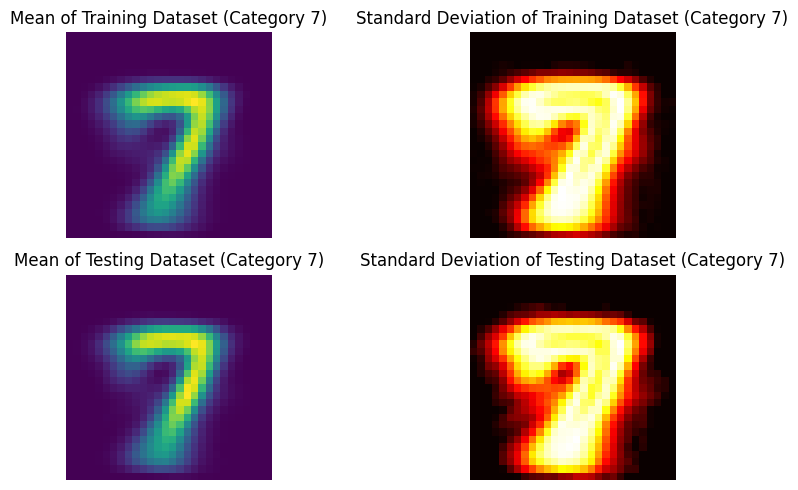

In [86]:
# Unbinarized Label "7".
x_train_seven = x_train[np.where(y_train == 7)]
x_test_seven = x_test[np.where(y_test == 7)]

im_train_avg_seven = np.mean(x_train_seven, axis = 0)
im_train_sd_seven = np.std(x_train_seven, axis = 0)

im_test_avg_seven = np.mean(x_test_seven, axis = 0)
im_test_sd_seven = np.std(x_test_seven, axis = 0)

fig, axes = plt.subplots(2, 2, figsize = (10, 5))

# Training dataset
axes[0, 0].imshow(im_train_avg_seven)
axes[0, 0].set_title("Mean of Training Dataset (Category 7)")
axes[0, 0].axis("off")

axes[0, 1].imshow(im_train_sd_seven, cmap = "hot")
axes[0, 1].set_title("Standard Deviation of Training Dataset (Category 7)")
axes[0, 1].axis("off")

# Testing dataset
axes[1, 0].imshow(im_test_avg_seven)
axes[1, 0].set_title("Mean of Testing Dataset (Category 7)")
axes[1, 0].axis("off")

axes[1, 1].imshow(im_test_sd_seven, cmap = "hot")
axes[1, 1].set_title("Standard Deviation of Testing Dataset (Category 7)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

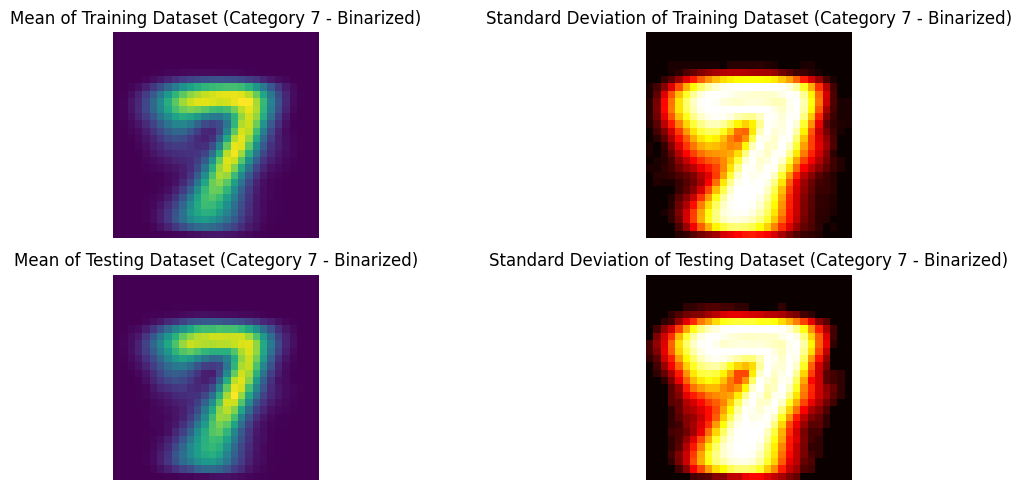

In [88]:
# Binarized Label "7".
x_train_seven_bin = (x_train_seven > im_train_avg_seven).astype(np.int64)
x_test_seven_bin = (x_test_seven > im_test_avg_seven).astype(np.int64)

im_train_avg_seven_bin = np.mean(x_train_seven_bin, axis = 0)
im_train_sd_seven_bin = np.std(x_train_seven_bin, axis = 0)

im_test_avg_seven_bin = np.mean(x_test_seven_bin, axis = 0)
im_test_sd_seven_bin = np.std(x_test_seven_bin, axis = 0)

fig, axes = plt.subplots(2, 2, figsize = (14, 5))

# Training dataset
axes[0, 0].imshow(im_train_avg_seven_bin)
axes[0, 0].set_title("Mean of Training Dataset (Category 7 - Binarized)")
axes[0, 0].axis("off")

axes[0, 1].imshow(im_train_sd_seven_bin, cmap = "hot")
axes[0, 1].set_title("Standard Deviation of Training Dataset (Category 7 - Binarized)")
axes[0, 1].axis("off")

# Testing dataset
axes[1, 0].imshow(im_test_avg_seven_bin)
axes[1, 0].set_title("Mean of Testing Dataset (Category 7 - Binarized)")
axes[1, 0].axis("off")

axes[1, 1].imshow(im_test_sd_seven_bin, cmap = "hot")
axes[1, 1].set_title("Standard Deviation of Testing Dataset (Category 7 - Binarized)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <li> Similar to the discussions on the digit "3," the mean binarized images for both the training and testing datasets reveal a clear representation of the digit "7" and its background.
        The digit "7" appears thin, which aligns with typical human writing styles.
        Both datasets show that the "hook" of the digit is more consistent, while there is greater variability in the head and tail of the digit.
        The mean binarized image of the training dataset appears slightly more blurry compared to the testing dataset, especially at the head and tail.
        This could be attributed to a higher degree of variability or noise in the training data, likely due to the larger number of images (6,265 training vs. 1,028 testing), as well as a broader range of handwriting styles.
        Despite this, both mean images are remarkably similar in terms of the spatial distribution of the digit and the background.
        This suggests that, even with some added noise in the training set, both datasets still contain fairly consistent representations of the digit "7".
        The similarity in their spatial distribution further reinforces the idea that the core features of the digit are well-defined in both sets.</li>
    <li> The standard deviation images reveal wider, more spread-out features, which aligns with our observations for the digit "3" and suggests a higher degree of variability in pixel values across the images.
        Both the training and testing dataset standard deviation images exhibit substantial variation, but overall, they show quite similar patterns.
        Again, both datasets contain considerable intra-class variation while retaining consistent overall structure of the digit "7".
        The greater variation at the head and tail of the digit further suggests that there are more discrepancies in handwriting practices or representations of "7" in those areas, which could be due to personal variations in how people write the upper and lower parts of the digit.</li>
    <li> Both the mean and standard deviation images demonstrate that the digit "7" occupies largely the same spatial area in both datasets, with minimal overlap with the background.
        This suggests that both datasets may be produced or preprocessed in a similar way, such as centering or normalization of the images.
        Interestingly, there is a portion at the top of the digit that remains consistently unexposed to any handwriting.
        Visually, it seems as though this area was intentionally clipped, or alternatively, it could suggest that people subconsciously avoid writing in that part of the space when forming the digit "7".
        Regardless of the reason, the consistent space usage between the training and testing datasets reinforces the idea that the image extraction and formatting process is standardized across both sets.</li>
</ul>
</div>

<div class="alert alert-block alert-info">
<b>Response: (Image binarization)</b> 
<ul>
    <li>
        In plain English, binarizing an image converts its pixel values into either 0 or 1 according to a certain threshold (cutoff value).
        More precisely, everything above a certain threshold will be evaluated at 1, and everything below it will be evaluated at 0.
        In other words, binarizing an image simplifies the original image by re-defining each pixel value as 0 or 1 based on a certain cutoff value, instead of keeping all the different pixel values that could range from 0 to 255.
    </li>
    <li>
        The new pixel value is 1 if the pixel value of the original image is larger than the mean value for that pixel across all images with that label, and 0 if the pixel value of the original image is smaller than the mean value for that pixel across all images with that label.
    </li>
</ul>
</div>

In [92]:
euclidean_dist = []

for i in range(len(x_train_three)):
    image = x_train_three[i]
    diff_image_squared = (image - im_train_avg_three) ** 2
    dist = np.sqrt(np.sum(diff_image_squared))
    euclidean_dist.append(dist)

euclidean_dist = np.array(euclidean_dist)

most_similar = np.argmin(euclidean_dist)
most_dissimilar = np.argmax(euclidean_dist)

euclidean_dist_binarized = []

for i in range(len(x_train_three_bin)):
    image = x_train_three_bin[i]
    diff_image_squared = (image - im_train_avg_three_bin) ** 2
    dist = np.sqrt(np.sum(diff_image_squared))
    euclidean_dist_binarized.append(dist)

euclidean_dist_binarized = np.array(euclidean_dist_binarized)

most_similar_binarized = np.argmin(euclidean_dist_binarized)
most_dissimilar_binarized = np.argmax(euclidean_dist_binarized)

print([[most_similar, most_dissimilar], [most_similar_binarized, most_dissimilar_binarized]])

[[926, 1729], [5282, 4857]]


<div class="alert alert-block alert-info">
<b>Response:</b> 
<ul>
    <table>
        <tr>
            <th>Index\Images</th>
            <th>Regular images</th>
            <th>Binarized images</th>
        </tr>
        <tr>
            <td>Most similar</td>
            <td>926</td>
            <td>5282</td>
        </tr>
        <tr>
            <td>Most dissimilar</td>
            <td>1729</td>
            <td>4857</td>
        </tr>
    </table>
    <li>
        The indices for both the most dissimilar image and the most similar image change when we switch from regular images to binarized images.
    </li>
    <li> Possible reasons behind the change in the indices for the most dissimilar and most similar images change when moving from regular images to binarized images:
        <ol>
            <li>
                <b><u>Difference in pixel representation:</u></b>
                <ul>
                    <li>
                        <b><u>Regular images:</u></b> The regular images have a range of pixel values, typically from 0 to 255, to represent a continuum spectrum of varying levels of colours and intensities.
                        This representation provides more details on the images.
                    </li>
                    <li>
                        <b><u>Binarized images:</u></b> Pixel values for binarized images are reduced to two possibilities: 0 or 1.
                        This process drastically simplifies the image and removes subtle differences, resulting in a "flattened" version of the image, retaining only coarse details.
                    </li>
                </ul>
            </li>
            <li>
                <b><u>Similarity measurement:</u></b>
                <ul>
                    <li>
                        <b><u>Regular images:</u></b> With pixel values range from 0 to 255, the Eucildean distance (or other similarity metrics) can capture subtle differences.
                        So, images with minor differences in pixel values would appear quite similar, and small differences in pixel intensity can significantly affect the distance metric.
                    </li>
                    <li>
                        <b><u>Binarized images:</u></b> The calculation of the Euclidean distance depends on only two possible pixel values, 0 and 1.
                        Hence, it essentially reduces to comparing the number of matching pixels, and we lose most fine details due to binarization.
                        Under this representation, "similar" is interpreted as more matching pixels, and "dissimilar" is interpreted as more mismatching pixels.
                    </li>
                </ul>
            </li>
        </ol>
    </li>
</ul>
</div>

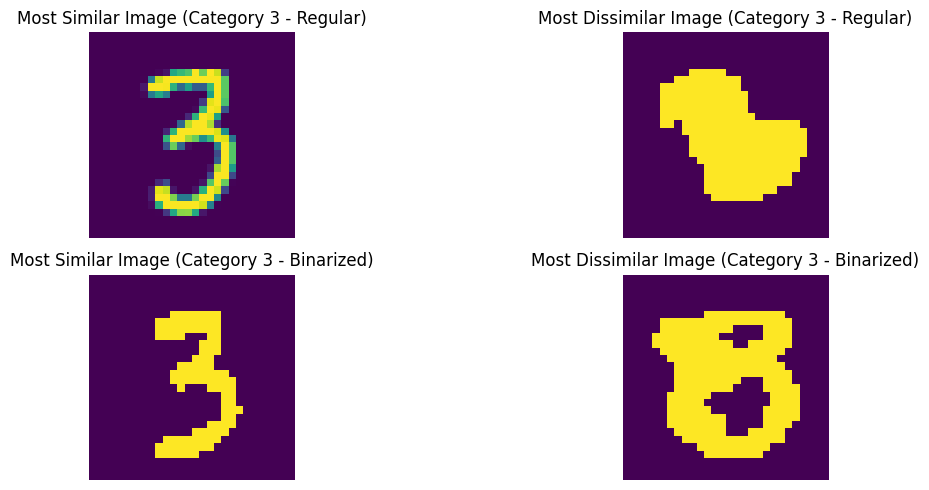

In [94]:
fig, axes = plt.subplots(2, 2, figsize = (14, 5))

# Training dataset
axes[0, 0].imshow(x_train_three[926])
axes[0, 0].set_title("Most Similar Image (Category 3 - Regular)")
axes[0, 0].axis("off")

axes[0, 1].imshow(x_train_three[1729])
axes[0, 1].set_title("Most Dissimilar Image (Category 3 - Regular)")
axes[0, 1].axis("off")

# Testing dataset
axes[1, 0].imshow(x_train_three_bin[5282])
axes[1, 0].set_title("Most Similar Image (Category 3 - Binarized)")
axes[1, 0].axis("off")

axes[1, 1].imshow(x_train_three_bin[4857])
axes[1, 1].set_title("Most Dissimilar Image (Category 3 - Binarized)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Response:</b> 
<ol>
    <li>
        <b><u>Effect of image binarization from a machine learning perspective:</u></b> <br>
        When we binarize images, we reduce the complexity of the images in terms of data representation.
        The binarization operation would highlight key features and structures, so it would be helpful if the main task is less dependent on finer details, such as edge and shape detections, pattern recognitions, etc.
        This will simplify the image significantly, thus reducing noise, and improve computational efficiency.
        As discussed above, binarization represents images with either 0 or 1, retaining only coarse details and leaving out more nuanced information.
    </li>
    <li>
        <b><u>Benefits of image binarization:</u></b>
        <ul>
            <li>
                <b><u>Improved efficiency:</u></b> The reduced complexity can speed up training since the model does not need to process as much information.
            </li>
            <li>
                <b><u>Noise reduction and classification problems:</u></b> Binarization helps remove background noise and isolate key features.
                Since binarization can highlight key features and structures, it can improve the performance of the machine learning models on classification or recognition tasks.
            </li>
        </ul>
    </li>
    <li>
        <b><u>Limitations of image binarization:</u></b>
        <ul>
            <li>
                <b><u>Loss of information:</u></b> Since binarization leaves out fine details, tasks that require fine-grained pixel intensity differences may be adversely affected, resulting in potential reductions in accuracy.
            </li>
            <li>
                <b><u>Oversimplification:</u></b> Reducing images to only two possible values can oversimplify complex data.
                This prevents models from learning subtle patterns or relevant patterns that exist in the intermediate values.
            </li>
        </ul>
    </li>
    <li>
        <b><u>Relation to data standardization:</u></b> Both binarization and standardization aim at simplifying or normalizing data, but binarization is more extreme.
        Standardization involves rescaling data so that it has a mean of 0 and a standard deviation of 1, ensuring that all features are on a comparable scale.
        In other words, standardization normalizes the scale, while preserving the variations in pixel values.
        On the other hand, binarization discards the fine-grained intensity values entirely.
    </li>
    <li>
        <b><u>Reasons for standardizing data:</u></b>
        <ul>
            <li>
                <b><u>Prevent feature domination:</u></b> Standardization rescales all features onto the same scale, so that features with large ranges would not dominate in distance-based machine learning algorithms, and ensure that all features are compared on the same ground.
            </li>
            <li>
                <b><u>Improves model accuracy:</u></b> Standardization reduces the impact of variations in data distributions, enabling models to extract meaningful patterns more effectively.
                This could lead to more accurate predictions and better generalization.
            </li>
        </ul>
    </li>
    <li>
        <b><u>Information from pixel-wise mean and standard deviation:</u></b>
        <ul>
            <li>
                <b><u>Pixel-wise mean:</u></b> For each given pixel position across multiple images, the mean returns the average value of that pixel across all the images.
                This helps us understand how a typical/average pixel looks like for that location in the images.
            </li>
            <li>
                <b><u>Pixel-wise standard deviation:</u></b> This captures the amount of variation exists at each pixel position across all images in a category.
                A high standard deviation indicates that there is a substantial amount of variability in pixel values at a specific position across the images.
                This could point to regions of the image that are more variable and might need to be captured in detail by the model in order to make accurate predictions.
                To illustrate, across the images of "3"s, regions with high variability highly likely represent parts of the digit that change depending on the handwriting or font style.
            </li>
        </ul>
    </li>
</ol>
</div>

## 3. Model Training, Validation, and Intepretation

### 3.1 Support Vector Machine
From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import svm

x_train_q3 = x_train[np.where((y_train == 3) | (y_train == 9))]
y_train_q3 = y_train[np.where((y_train == 3) | (y_train == 9))]

y_train_q3[y_train_q3 == 3] = 0
y_train_q3[y_train_q3 == 9] = 1

Set1_x, Set2_x, Set1_y, Set2_y = train_test_split(x_train_q3, y_train_q3, test_size = 0.40, random_state = 42, stratify = y_train_q3)

linear_svm_classifier = svm.SVC(kernel = "linear")
linear_svm_classifier.fit(Set1_x.reshape(Set1_x.shape[0], -1), Set1_y)

Set1_y_predict = linear_svm_classifier.predict(Set1_x.reshape(Set1_x.shape[0], -1))
Set2_y_predict = linear_svm_classifier.predict(Set2_x.reshape(Set2_x.shape[0], -1))

In [111]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Set1_y, Set1_y_predict))
print(accuracy_score(Set2_y, Set2_y_predict))

1.0
0.9759933774834437


<div class="alert alert-block alert-info">
<b>Response:</b> 
<table>
    <tr>
        <th></th>
        <th>Training Set</th>
        <th>Testing Set</th>
    </tr>
    <tr>
        <td>Prediction Accuracy</td>
        <td>100%</td>
        <td>97.6%</td>
    </tr>
</table>
</div>

### 3.2 Modeling with Engineered Data
We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
- For each image row $i$, find $n_i$, the sum of 1's in the row (28 features).
- For each image column $j$, find $n_j$, the sum of 1's in the column (28 features).
- Concatenate these features to form a feature vector of 56 features.

What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?

In [115]:
Set1_x_bin = (Set1_x > 128).astype(np.int64)
Set2_x_bin = (Set2_x > 128).astype(np.int64)

Set1_x_bin_features = []

for image in Set1_x_bin:
    n_i = image.sum(axis = 1)
    n_j = image.sum(axis = 0)
    feature = np.concatenate([n_i, n_j])
    Set1_x_bin_features.append(feature)

Set1_x_bin_features = np.array(Set1_x_bin_features)

Set2_x_bin_features = []

for image in Set2_x_bin:
    n_i = image.sum(axis = 1)
    n_j = image.sum(axis = 0)
    feature = np.concatenate([n_i, n_j])
    Set2_x_bin_features.append(feature)

Set2_x_bin_features = np.array(Set2_x_bin_features)

linear_svm_classifier_bin = svm.SVC(kernel = "linear")
linear_svm_classifier_bin.fit(Set1_x_bin_features, Set1_y)

Set1_y_predict_bin = linear_svm_classifier_bin.predict(Set1_x_bin_features)
Set2_y_predict_bin = linear_svm_classifier_bin.predict(Set2_x_bin_features)

print(accuracy_score(Set1_y, Set1_y_predict_bin))
print(accuracy_score(Set2_y, Set2_y_predict_bin))

0.9660596026490066
0.9658526490066225


In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_bin = KNeighborsClassifier()
knn_classifier_bin.fit(Set1_x_bin_features, Set1_y)

Set1_y_predict_bin_knn = knn_classifier_bin.predict(Set1_x_bin_features)
Set2_y_predict_bin_knn = knn_classifier_bin.predict(Set2_x_bin_features)

print(accuracy_score(Set1_y, Set1_y_predict_bin_knn))
print(accuracy_score(Set2_y, Set2_y_predict_bin_knn))

0.9784768211920529
0.96875


<div class="alert alert-block alert-info">
<b>Response:</b> 
<table>
    <tr>
        <th>Model\Dataset</th>
        <th>Training Set</th>
        <th>Testing Set</th>
    </tr>
    <tr>
        <td>Linear SVM</td>
        <td>96.606%</td>
        <td>96.585%</td>
    </tr>
    <tr>
        <td>kNN</td>
        <td>97.848%</td>
        <td>96.875%</td>
    </tr>
</table>
The prediction accuracies on both the training and testing sets using linear SVM are higher when using the original images as input instead of binarized images.
However, the differences are not large, indicating that while there is an impact from image binarization, we did not suffer from substantial information loss, i.e., the crucial details for identifying digits are mostly retained so that the models can still distinguish digits with very high accuracy.
This signifies the importance of careful feature engineering in machine learning.
Transforming input data (through feature engineering) could potentially impact model performance significantly.
In this case, it slightly reduces the prediction accuracy.
However, the optimal approach depends on the specific characteristics of the dataset and the task on hand.
</div>

### 3.3 K-Nearest Neighbors
In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

For $k = 4$, what is the label that was predicted with lowest accuracy?

For $k = 20$, what is the label that was predicted with lowest accuracy?

What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?

Visualize 5 mislabeled samples with their actual and predicted labels.

Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shapes.

In [127]:
from collections import Counter

x_train_odd = x_train[np.where((y_train == 1) | (y_train == 3) | (y_train == 5) | (y_train == 7) | (y_train == 9))]
y_train_odd = y_train[np.where((y_train == 1) | (y_train == 3) | (y_train == 5) | (y_train == 7) | (y_train == 9))]

x_test_odd = x_test[np.where((y_test == 1) | (y_test == 3) | (y_test == 5) | (y_test == 7) | (y_test == 9))]
y_test_odd = y_test[np.where((y_test == 1) | (y_test == 3) | (y_test == 5) | (y_test == 7) | (y_test == 9))]

x_train_odd_features = x_train_odd.reshape(x_train_odd.shape[0], -1)
x_test_odd_features = x_test_odd.reshape(x_test_odd.shape[0], -1)

In [129]:
overall_confusion = Counter()
k_values = range(4, 41, 4)
misclassified_samples = {k: [] for k in k_values}
predictions = {k: [] for k in k_values}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_odd_features, y_train_odd)
    x_train_odd_predict = knn.predict(x_train_odd_features)
    x_test_odd_predict = knn.predict(x_test_odd_features)
    predictions[k] = x_test_odd_predict
    x_train_odd_score = accuracy_score(y_train_odd, x_train_odd_predict)
    x_test_odd_score = accuracy_score(y_test_odd, x_test_odd_predict)
    print(f"k = {k}, Training Accuracy: {x_train_odd_score:.4f}, Testing Accuracy: {x_test_odd_score:.4f}")
    if k == 4 or k == 20:
        label_scores = {}
        for label in np.unique(y_test_odd):
            label_indices = np.where(y_test_odd == label)[0]
            label_predict = x_test_odd_predict[label_indices]
            label_score = np.mean(label_predict == label)
            label_scores[label] = label_score
        lowest_accuracy_label = min(label_scores, key = label_scores.get)
        print(f"Lowest accuracy for k = {k}: Label {lowest_accuracy_label}, Accuracy: {label_scores[lowest_accuracy_label]:.4f}")

    # Track misclassifications across all k values
    for true_label, predicted_label in zip(y_test_odd, x_test_odd_predict):
        if true_label != predicted_label:
            overall_confusion[(true_label, predicted_label)] += 1
    
    # Track misclassifications for each k value
    misclassified_indices = np.where(x_test_odd_predict != y_test_odd)[0]
    misclassified_samples[k] = misclassified_indices

overall_confusion
# most_confused_pair = overall_confusion.most_common(1)
# print(f"Most confused label pair across all k values: {most_confused_pair[0][0]} with {most_confused_pair[0][1]} misclassifications")

k = 4, Training Accuracy: 0.9894, Testing Accuracy: 0.9767
Lowest accuracy for k = 4: Label 9, Accuracy: 0.9643
k = 8, Training Accuracy: 0.9851, Testing Accuracy: 0.9771
k = 12, Training Accuracy: 0.9821, Testing Accuracy: 0.9767
k = 16, Training Accuracy: 0.9796, Testing Accuracy: 0.9762
k = 20, Training Accuracy: 0.9780, Testing Accuracy: 0.9754
Lowest accuracy for k = 20: Label 7, Accuracy: 0.9572
k = 24, Training Accuracy: 0.9763, Testing Accuracy: 0.9740
k = 28, Training Accuracy: 0.9744, Testing Accuracy: 0.9732
k = 32, Training Accuracy: 0.9737, Testing Accuracy: 0.9728
k = 36, Training Accuracy: 0.9721, Testing Accuracy: 0.9710
k = 40, Training Accuracy: 0.9711, Testing Accuracy: 0.9708


Counter({(7, 1): 311,
         (7, 9): 148,
         (5, 3): 119,
         (9, 7): 116,
         (3, 5): 111,
         (9, 3): 91,
         (3, 7): 89,
         (9, 5): 67,
         (9, 1): 66,
         (5, 9): 45,
         (3, 9): 38,
         (3, 1): 32,
         (5, 1): 25,
         (5, 7): 23,
         (1, 3): 18})

<div class="alert alert-block alert-info">
<b>Response:</b>
<ul>
    <li>
        For $k = 4$, the label that was predicted with lowest accuracy is <b><u>"9"</u></b>, with a predicted accuracy of 96.43%.
    </li>
    <li>
        For $k = 20$, the label that was predicted with lowest accuracy is <b><u>"7"</u></b>, with a predicted accuracy of 95.72%.
    </li>
    <li>
        The label pair that was confused most often (i.e., class A is labeled as B, and vice versa) is <b><u>(7, 9)</u></b>.
        They are confused for a total of 264 times among a total number of 1,299 mismatchings among all $k$ values.
    </li>
</ul>
</div>

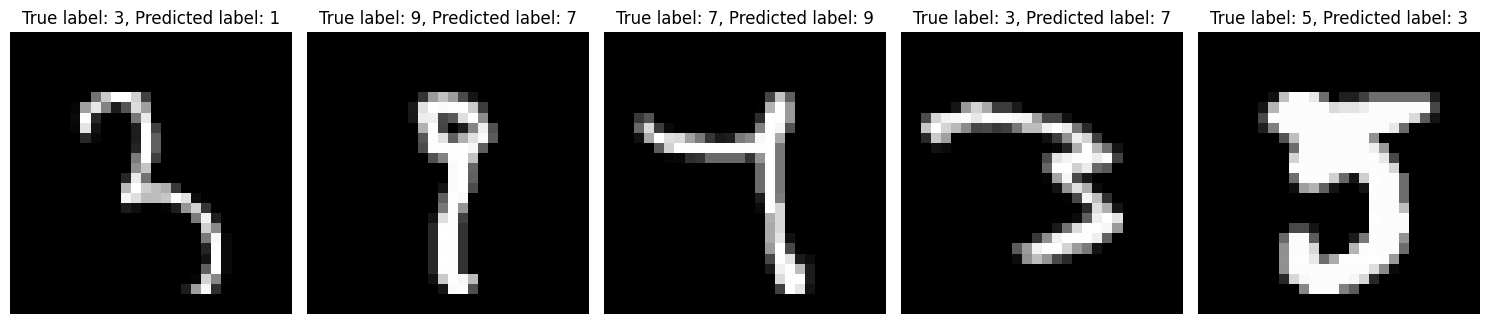

In [151]:
k = 4
misclassified_indices = misclassified_samples[k][:5]

fig, axes = plt.subplots(1, 5, figsize = (15, 6))
for ax, idx in zip(axes, misclassified_indices[:5]):
    ax.imshow(x_test_odd[idx].reshape(28, 28), cmap = "gray")
    ax.axis("off")
    ax.set_title(f"True label: {y_test_odd[idx]}, Predicted label: {predictions[k][idx]}")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Response:</b>
<ul>
    <li>
        From a pattern or shape similarity perspective, if two labels (digits) inherently share a large portion of similar shapes or patterns, they would be more challenging to separate.
        Although, the ability for the model to distinguish between them will also depend on the quality and consistency of the handwriting in the training data.
        So, variability in handwriting styles could pose significant difficulties to the model for correct identification.
    </li>
    <li>
        Some digit pairs that the model might stuggle to identify or distinguish from one another:
        <ol>
            <li>
                Labels "1" and "7":<br>
                They share substantial similarities in shape, with the main difference being the top horizontal stroke of the "7".
                If this stroke is written very short or is missing, a "7" could be mistaken for a "1" pretty easily.
                Conversely, if a "1" is written with a serif or a slight horizontal stroke at the top, it might be mistaken as a "7".
            </li>
            <li>
                Labels "1" and "9":<br>
                They both have a similar vertical stroke, and differ at the top.
                If the loop of the "9" is written very small or is not distinctive, it would be hard to distinguish from "1".
                It gets even more challenging if in addition, the "9"'s vertical stroke is straight instead of curved at the bottom.
            </li>
            <li>
                Labels "3" and "5":<br>
                Labels "3" and "5" share similar patterns; both have a curved bottom and top.
                The main difference is in the middle section, where "3" curves outward and "5" has a vertical line.
                If the middle section of a "5" is written with a slight curve instead of a straight line, or if the top part of "5" is written poorly so that it sticks together (see an example above), it could easily be mistaken for a "3".
            </li>
            <li>
                Labels "7" and "9"<br>
                Both digits have a similar vertical stroke.
                The main difference is that "7" has a long horizontal stroke at the top, while "9" has a loop in place of a long horizontal stroke.
                If the loop at the top of "9" is too small, unclosed, or poorly written, it could be hard to distinguish from "7".
            </li>
        </ol>
    </li>
</ul>
</div>

### 3.4 Comprehensive Questions
Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?

If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?

<div class="alert alert-block alert-info">
<b>Response:</b>
<ul>
    <li>
        Having separate training and testing datasets allows us to train the model by learning the underlying patterns on the training dataset and evaluate the model's performance on the testing dataset (the unseen data).
        Basically, the training dataset is used to teach the model by allowing it to learn patterns and relationships within the data, while the testing dataset, on the other hand, serves as a proxy for real-world data that the model has never encountered before.
    </li>
    <li>
        Using the same data for both training and evaluation can lead to <b>overfitting</b>, where the model memorizes the training data instead of learning generalizable patterns.
        This could lead to artificially high accuracy during evaluation but poor performance on new, unseen data, i.e., we could be overstating the capabilities of the model.
        Without a separate testing dataset, it is impossible to assess whether the model has truly learned meaningful patterns or is simply overfitting.
    </li>
    <li>
        If the model achieves high accuracy on the training set but low accuracy on the testing set, this could be an indication of <b>overfitting</b>.
        It means that our model is only able to capture patterns well within the training set, but it cannot extrapolate to unseen data.
        This highlights the inability to generalize.
    </li>
</ul>